# Computing the lagged coherence of a signal using neurodsp

This notebook shows how to use the neurodsp module to compute lagged coherence. For more details, see [Fransen et al., 2015, Neuroimage](http://www.sciencedirect.com/science/article/pii/S1053811915004796).

In [1]:
import numpy as np
from neurodsp.laggedcoherence import lagged_coherence

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt

### Simulate signal with periodic bursts

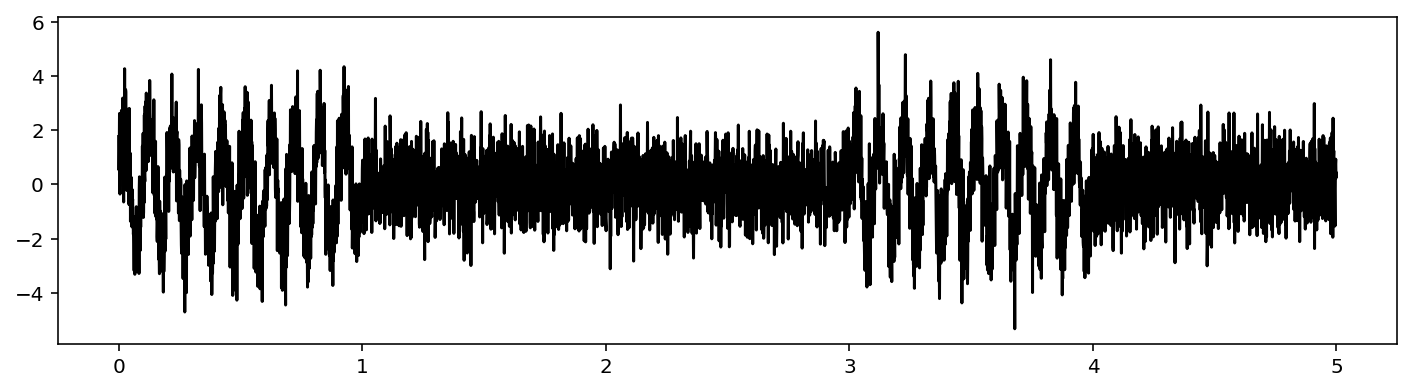

In [2]:
N = 5000
Fs = 1000
burst_freq = 10
burst_starts = [0, 3000]
burst_seconds = 1
burst_samples = burst_seconds*Fs

# Design burst kernel
burst_kernel_t = np.arange(0, burst_seconds, 1/Fs)
burst_kernel = 2*np.sin(burst_kernel_t*2*np.pi*burst_freq)

# Generate random signal with bursts
t = np.arange(0, N/Fs, 1/Fs)
np.random.seed(0)
x = np.random.randn(N)
for i in burst_starts:
    x[i:i+burst_samples] += burst_kernel

# Plot example signal
plt.figure(figsize=(12,3))
plt.plot(t, x, 'k')

# Compute lagged coherence for a beta oscillation

In [3]:
f_range = (8, 12)
lag_coh_alpha = lagged_coherence(x, f_range, Fs)
print('Lagged coherence = ', lag_coh_alpha)

Lagged coherence =  0.7763874314234404


# Compute lagged coherence across the frequency spectrum
Notice that lagged coherence peaks around 10Hz (the frequency of our oscillator), but it is not very specific to that frequency.

/gh/bv/neurodsp/neurodsp/laggedcoherence.py:87: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs(lcs_num / lcs_denom)


Text(0, 0.5, 'Lagged coherence')

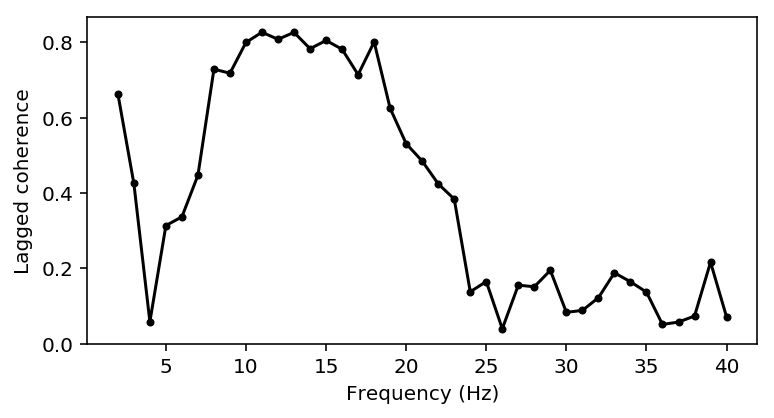

In [4]:
lag_coh_by_f, f = lagged_coherence(x, (1, 40), Fs, return_spectrum=True)

# Visualize lagged coherence as a function of frequency
plt.figure(figsize=(6,3))
plt.plot(f, lag_coh_by_f, 'k.-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Lagged coherence')

# Compute lagged coherence for time segments with and without burst
Note that lagged coherence is greater when analyzing a neural signal that has a burst in the frequency range of interest, compared to a signal that does not have an oscillator.

In [5]:
samp_burst = np.arange(1000)
samp_noburst = np.arange(1000, 2000)

lag_coh_burst = lagged_coherence(x[samp_burst], f_range, Fs)
lag_coh_noburst = lagged_coherence(x[samp_noburst], f_range, Fs)
print('Lagged coherence, bursting = ', lag_coh_burst)
print('Lagged coherence, not bursting = ', lag_coh_noburst)

Lagged coherence, bursting =  0.9987945421210493
Lagged coherence, not bursting =  0.6340581331289348


# Compute lagged coherence of an example neural signal

Text(0, 0.5, 'Voltage (uV)')

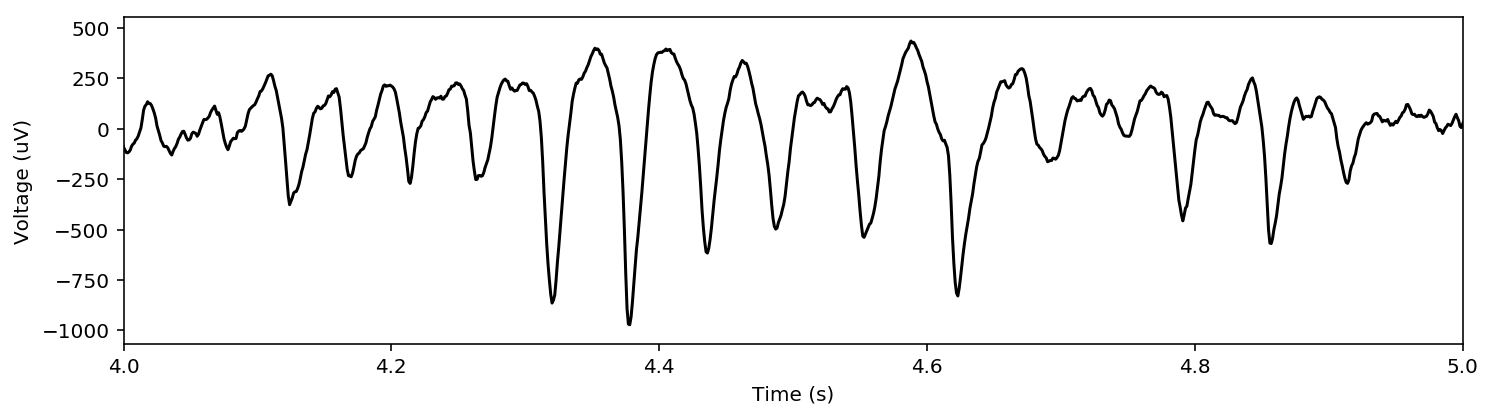

In [6]:
# Load signal
x = np.load('./data/sample_data_1.npy')
x_filt_true = np.load('./data/sample_data_1_filt.npy')
Fs = 1000
t = np.arange(0, len(x)/Fs, 1/Fs)
f_range = (13,30)

# Plot example signal
plt.figure(figsize=(12,3))
plt.plot(t, x, 'k')
plt.xlim((4,5))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')

In [7]:
f_range = (13, 30)
lag_coh_beta = lagged_coherence(x, f_range, Fs)
print('Lagged coherence = ', lag_coh_beta)

Lagged coherence =  0.24582055225422916
